## Testing out the Slidwing Window (SW) Implementation in ASDETECT

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


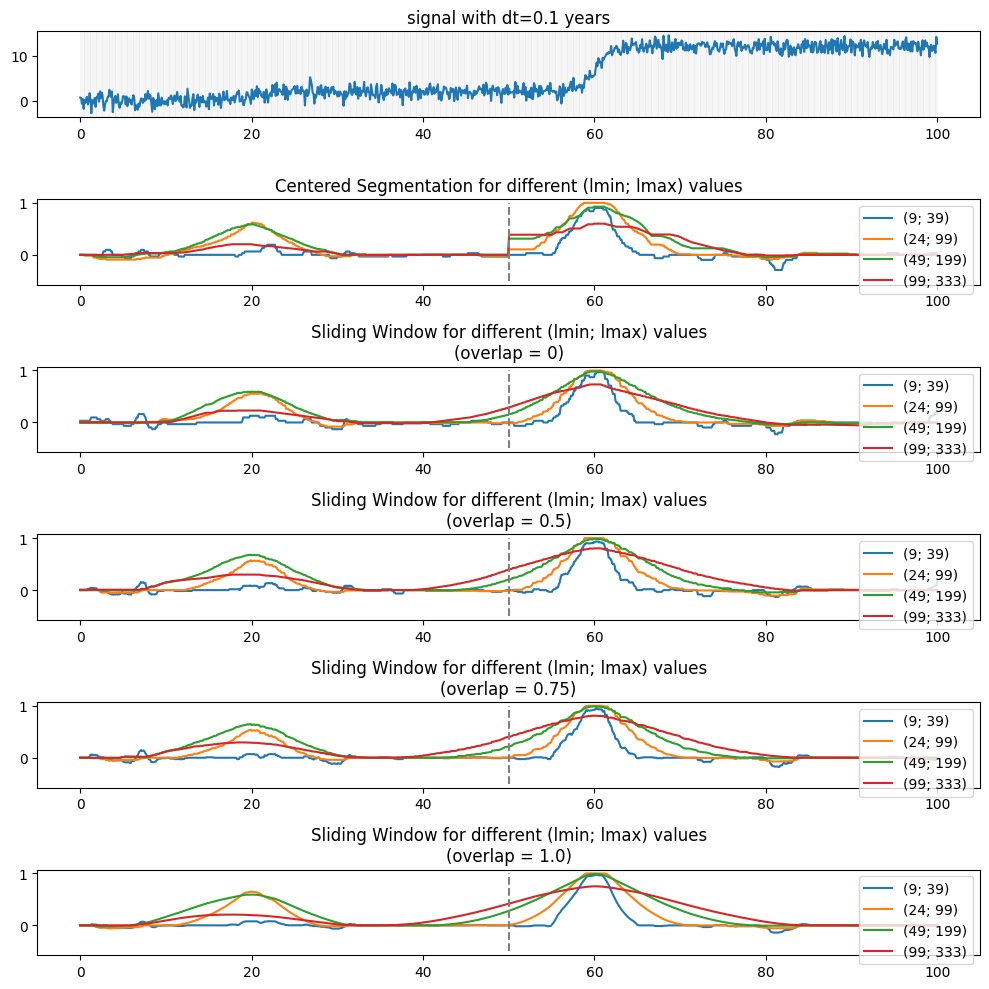

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal)
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')

# PLOT: CENTERED SEGMENTATION ==========================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASDETECT(
        lmin=lmin,
        lmax=lmax,)
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax2.plot(time, dts, label=f'({lmin}; {lmax})')
ax2.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax2.set_title('Centered Segmentation for different (lmin; lmax) values')
ax2.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax3.plot(time, dts, label=f'({lmin}; {lmax})')
ax3.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax3.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0.5
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax4.plot(time, dts, label=f'({lmin}; {lmax})')
ax4.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax4.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax4.legend()


# PLOT: SLIDING WINDOW ==========================
overlap = 0.75
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax5.plot(time, dts, label=f'({lmin}; {lmax})')
ax5.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax5.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax5.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 1.0
ax6 = fig.add_subplot(gs[5, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax6.plot(time, dts, label=f'({lmin}; {lmax})')
ax6.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax6.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax6.legend()


plt.tight_layout()
plt.show()

## Check Sliding Steps

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

def make_normalization_plot(counter, lmin, lmax, overlap):
    """Make a plot showing how often each point was counted in the detection time series.

    This is useful to understand the normalization of the detection time series.

    >> Args:
        counter:
            1D array of counts, shape (n,)
        lmin:
            Smallest segment length
        lmax:
            Largest segment length
        overlap:
            Relative overlap between segments
    """
    plt.figure(figsize=(10, 4))
    plt.plot(counter, label='Count of how often each point was included in a segment')
    plt.xlabel('Time index')
    plt.ylabel('Count')
    plt.title(f'Normalization Counter (lmin={lmin}, lmax={lmax}, overlap={overlap})')
    plt.legend()
    plt.grid()
    plt.show()

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


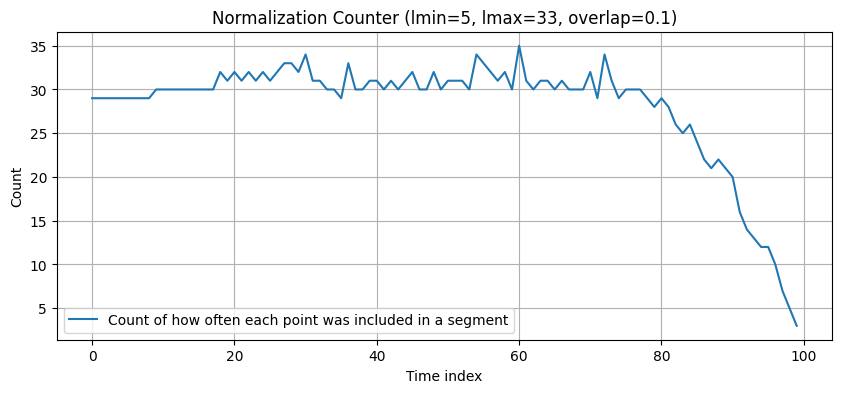

In [ ]:
# new ASSWDETECT method

lmin = 5
lmax = nT//3
overlap = 0.1

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=overlap,
)
dts = detector.fit_predict(
    signal,
    time,t
    return_counter=True,
    #verbose=True,
)

make_normalization_plot(dts, lmin, lmax, overlap=overlap)

## Compare Computation Time

In [2]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

lmin = 5
lmax = nT//3

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

In [3]:
# old ASDETECT method

# Computation
detector = ASDETECT(
    lmin=lmin,
    lmax=lmax,)
dts = detector.fit_predict(
    signal,
    time,
    )
        

In [4]:
# new ASSWDETECT method

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=1,
)
dts = detector.fit_predict(
    signal,
    time,
)

In [4]:
import numpy as np
import xarray as xr
from toad import TOAD

# load example dataset
data = xr.open_dataset("tutorials/test_data/garbe_2020_antarctica.nc")
data = data.drop_vars(["lat", "lon"])  # drop lat/lon to use the native coordinates

# lower the resolution to speed up computation
data = data.coarsen(x=10, y=10, time=2, boundary="trim").reduce(np.mean)
td = TOAD(data)

In [6]:
from toad.shifts import ASDETECT

td.compute_shifts("thk", method=ASDETECT(), overwrite=True)

INFO: Applying detector ASDETECT to thk


In [8]:
from toad.shifts.methods.asdetect import ASDETECT

td.compute_shifts("thk", method=ASDETECT(), overwrite=True)

INFO: Applying detector ASDETECT to thk


In [23]:
from toad.shifts.methods.asswdetect import ASSWDETECT

td.compute_shifts("thk", method=ASSWDETECT(overlap=0.1), overwrite=True)

INFO: Applying detector ASSWDETECT to thk


In [28]:
fp = "benchmark_results.csv"

import pandas as pd

df = pd.read_csv(fp)

display(df)

,method,run,overlap,time
0,ASDETECT,1,NaN,0.908965
1,ASDETECT,2,NaN,1.018827
2,ASDETECT,3,NaN,1.013829
3,ASSWDETECT,1,0.00,0.896889
4,ASSWDETECT,2,0.00,0.955356
5,ASSWDETECT,3,0.00,1.001442
6,ASSWDETECT,1,0.10,1.061482
7,ASSWDETECT,2,0.10,1.064375
8,ASSWDETECT,3,0.10,1.053238
9,ASSWDETECT,1,0.25,1.234635


## Double Sliding Window

As SW always starts at the beginning of the time series, the values in the end will be used not as often. The idea now is, to do SW once from the front and once from the back to compensate for this inequality.

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


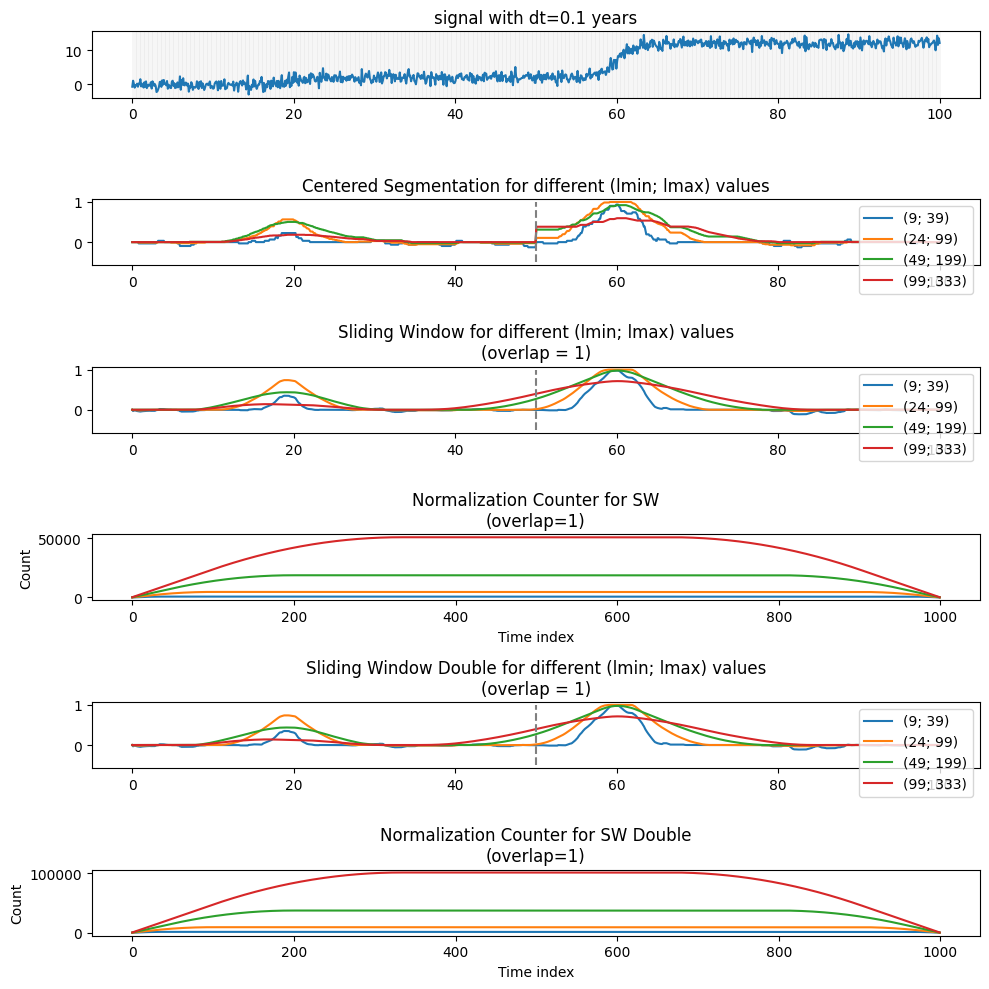

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT
from toad.shifts.methods.asswdetect_double import ASSWDETECT as ASSWDETECT_DOUBLE

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time
overlap = 1
l_tuple = [(9,39),(24,99),(49,199),(99,333)]

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal)
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')

# PLOT: CENTERED SEGMENTATION ==========================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for lmin, lmax in l_tuple:
    detector = ASDETECT(
        lmin=lmin,
        lmax=lmax,)
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax2.plot(time, dts, label=f'({lmin}; {lmax})')
ax2.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax2.set_title('Centered Segmentation for different (lmin; lmax) values')
ax2.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = overlap
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[3, 0])
for lmin, lmax in l_tuple:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap
    )
    dts = detector.fit_predict(
        signal,
        time,
        )
    counter = detector.fit_predict(
        signal,
        time,
        return_norm=True,
        )

    ax3.plot(time, dts, label=f'({lmin}; {lmax})')
    ax4.plot(counter, label=f'({lmin}; {lmax})')
ax3.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax3.legend()

# PLOT: COUNTER FOR SLIDING WINDOW DOUBLE ==========================
ax4.set_xlabel('Time index')
ax4.set_ylabel('Count')
ax4.set_title(f'Normalization Counter for SW\n(overlap={overlap})')

# PLOT: SLIDING WINDOW DOUBLE ==========================
overlap = overlap
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
ax6 = fig.add_subplot(gs[5, 0])
for lmin, lmax in l_tuple:
    detector = ASSWDETECT_DOUBLE(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )
    counter = detector.fit_predict(
        signal,
        time,
        return_norm=True,
        )

    ax5.plot(time, dts, label=f'({lmin}; {lmax})')
    ax6.plot(counter, label=f'({lmin}; {lmax})')
ax5.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax5.set_title(f'Sliding Window Double for different (lmin; lmax) values\n(overlap = {overlap})')
ax5.legend()

# PLOT: COUNTER FOR SLIDING WINDOW DOUBLE ==========================
ax6.set_xlabel('Time index')
ax6.set_ylabel('Count')
ax6.set_title(f'Normalization Counter for SW Double\n(overlap={overlap})')

plt.tight_layout()
plt.show()

## Compare Cluster Run Time Data

In [2]:
import numpy as np
import pandas as pd

# import csv-file
fp = "data_time/sw_time_04.csv"
data = pd.read_csv(fp)

# display first rows
data.head()

,method,run,overlap,time
0,ASDETECT,1,NaN,123.010672
1,ASDETECT,2,NaN,122.725063
2,ASDETECT,3,NaN,122.710890
3,ASDETECT,4,NaN,122.898415
4,ASDETECT,5,NaN,122.677947


In [3]:
# group data by 'method' and 'overlap', include 'NaN' as a overlap-value
grouped = data.groupby(['method', 'overlap'], dropna=False)
# calculate mean and std for each group
summary = grouped.agg({'time': ['mean', 'std']}).reset_index()
# flatten MultiIndex columns
summary.columns = ['method', 'overlap', 'mean_time', 'std_time']
# display the summary
summary

,method,overlap,mean_time,std_time
0,ASDETECT,NaN,122.794045,0.137825
1,ASSWDETECT,0.0,125.471558,0.115174
2,ASSWDETECT,0.1,133.271036,0.152226
3,ASSWDETECT,0.2,149.564458,0.180348
4,ASSWDETECT,0.3,167.408547,0.151833
5,ASSWDETECT,0.4,192.965063,0.180050
6,ASSWDETECT,0.5,230.335553,0.152934
7,ASSWDETECT,0.6,279.642634,0.203805
8,ASSWDETECT_DOUBLE,0.0,249.630903,0.536220
9,ASSWDETECT_DOUBLE,0.1,264.026399,0.240200


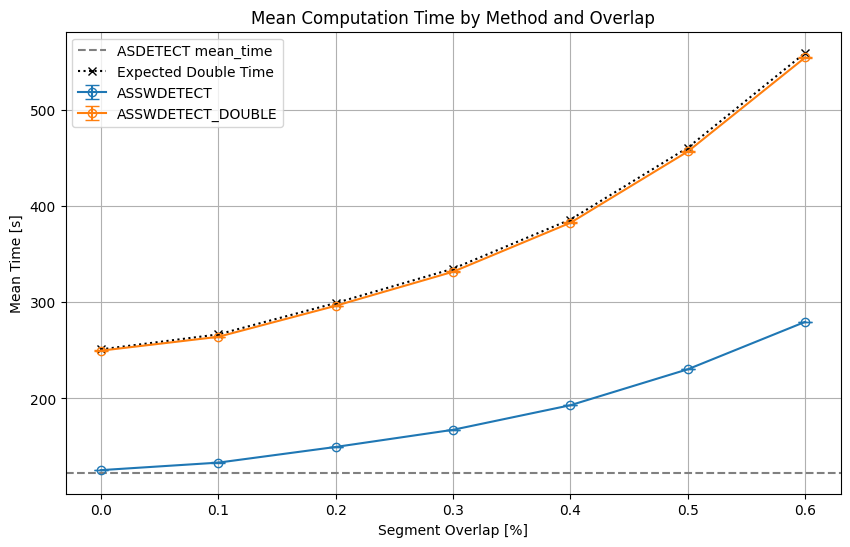

In [4]:
# plot mean times with error bars for std
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for method in summary['method'].unique():
    if method == 'ASDETECT':
        # Draw a horizontal line for ASDETECT mean_time
        plt.axhline(
            y=summary.loc[summary['method'] == method, 'mean_time'].values[0],
            color='grey', linestyle='--', label='ASDETECT mean_time'
        )
        continue
    method_data = summary[summary['method'] == method]
    plt.errorbar(
        method_data['overlap'],
        method_data['mean_time'],
        yerr=method_data['std_time'],
        label=method,
        capsize=5,
        marker='o',
        markerfacecolor='none',
    )
    if method == 'ASSWDETECT':
        plt.plot(
            method_data['overlap'],
            2 * method_data['mean_time'],
            label='Expected Double Time',
            linestyle=':', color='black',
            marker='x',
        )
plt.xlabel('Segment Overlap [%]')
plt.ylabel('Mean Time [s]')
plt.title('Mean Computation Time by Method and Overlap')
plt.legend()
plt.grid()
plt.show()

## Gap Histogram

In [16]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asswdetect_double_new import ASSWDETECT as ASSWDETECT_DOUBLE

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
Tmax = 500 # years
overlap = 0

# proved some space
hist = np.full((Tmax,Tmax+1), -1)

# ITERATION: get gap counter for different Tmax values ==========================
for T in range(15,Tmax+1):

# SIGNAL GENERATION ============================================================
    noise = np.random.normal(size=T)
    time = np.linspace(0,T, T)

    signal = (noise 
                + shift(10, time, T*0.6)
                + shift(2,time,T*0.2)   
            )


    detector = ASSWDETECT_DOUBLE(
        overlap=overlap
    )
    counter = detector.fit_predict(
        signal,
        time,
        return_gap=True,
        )
    counter[0] = 0
    counter[-1] = 0

    hist[:T,T] = counter

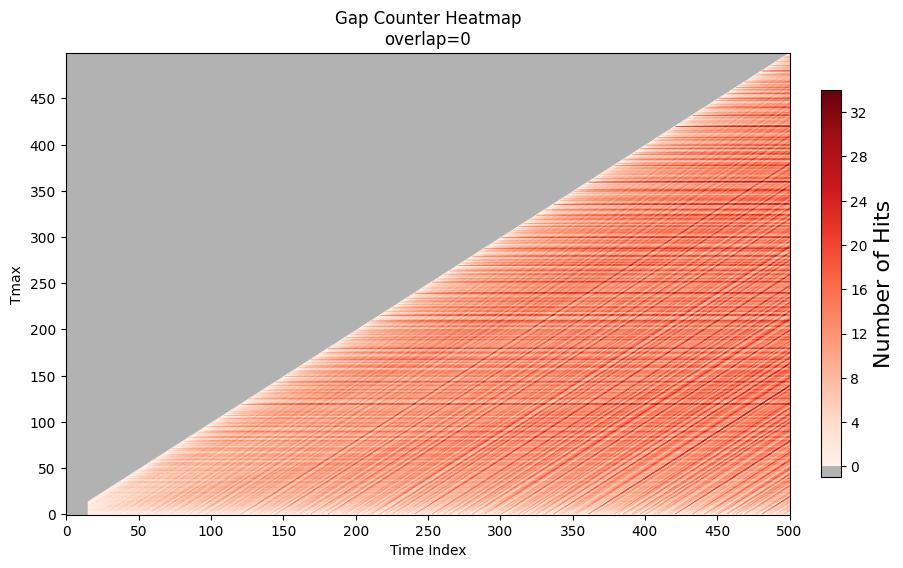

In [17]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
import numpy as np

color_res = 4*256
cmap_reds = matplotlib.colormaps['Reds']
newcolors = cmap_reds(np.linspace(0, 1, color_res))
grey = np.array([0.7, 0.7, 0.7, 1])
ix = color_res//(hist.max()+1)
newcolors = np.copy(newcolors)
newcolors[:ix, :] = grey
cmap_custom = ListedColormap(newcolors)

plt.figure(figsize=(10, 6))
plt.imshow(
    hist,
    aspect='auto',
    cmap=cmap_custom,
    origin='lower',
    )
#plt.colorbar(label='Counter Value')
plt.xlabel('Time Index')
plt.ylabel('Tmax')
plt.title(f'Gap Counter Heatmap\noverlap={overlap}')


# Create a colorbar
cbar = plt.colorbar(orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label('Number of Hits', fontsize=16)
cbar.ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

# set ticks to integer values only
plt.xticks(ticks=np.arange(0, Tmax+1, Tmax//10))
plt.yticks(ticks=np.arange(0, Tmax, Tmax//10))

plt.show()